In [5]:
import pandas as pd

#File path
file_path = '/Users/halk/Downloads/healthcare_dataset.csv'

#load dataset into pandas df
df = pd.read_csv(file_path)

print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [6]:
#change all columns to lowercase
df.columns = df.columns.str.lower()

#Standardize text columns
df['name'] = df['name'].str.title()

df['medical condition'] = df['medical condition'].str.title()

#convert date columns to date time
df['date of admission'] = pd.to_datetime(df['date of admission'])

df['discharge date'] = pd.to_datetime(df['discharge date'], errors='coerce')

#fill missing values
df['test results'] = df['test results'].fillna('Unknown')

#print cleaned data
print(df.head())


            name  age  gender blood type medical condition date of admission  \
0  Bobby Jackson   30    Male         B-            Cancer        2024-01-31   
1   Leslie Terry   62    Male         A+           Obesity        2019-08-20   
2    Danny Smith   76  Female         A-           Obesity        2022-09-22   
3   Andrew Watts   28  Female         O+          Diabetes        2020-11-18   
4  Adrienne Bell   43  Female        AB+            Cancer        2022-09-19   

             doctor                    hospital insurance provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   billing amount  room number admission type discharge date   medication  \
0    18856.281306    

In [7]:
#calculate hospital stay
df['hospital stay duration'] = (df['discharge date'] - df['date of admission']).dt.days

#form age groups
df['age group'] = pd.cut(df['age'], bins=[0, 18, 35, 55, 100], labels=['Young Adult', 'Middle-Aged', 'Older', 'Senior'])

In [8]:
#encode categorical vars
df_encoded = pd.get_dummies(df, columns=['gender', 'blood type', 'medical condition', 'insurance provider', 'admission type', 'medication', 'age group'])

print(df_encoded.head())

            name  age date of admission            doctor  \
0  Bobby Jackson   30        2024-01-31     Matthew Smith   
1   Leslie Terry   62        2019-08-20   Samantha Davies   
2    Danny Smith   76        2022-09-22  Tiffany Mitchell   
3   Andrew Watts   28        2020-11-18       Kevin Wells   
4  Adrienne Bell   43        2022-09-19    Kathleen Hanna   

                     hospital  billing amount  room number discharge date  \
0             Sons and Miller    18856.281306          328     2024-02-02   
1                     Kim Inc    33643.327287          265     2019-08-26   
2                    Cook PLC    27955.096079          205     2022-10-07   
3  Hernandez Rogers and Vang,    37909.782410          450     2020-12-18   
4                 White-White    14238.317814          458     2022-10-09   

   test results  hospital stay duration  ...  admission type_Urgent  \
0        Normal                       2  ...                   True   
1  Inconclusive             

In [12]:
#drop irrelevant columns

df_cleaned = df_encoded.drop(['name', 'doctor', 'hospital', 'discharge date'], axis=1)
print(df_cleaned.dtypes)


age                                             int64
date of admission                      datetime64[ns]
billing amount                                float64
room number                                     int64
test results                                   object
hospital stay duration                          int64
gender_Female                                    bool
gender_Male                                      bool
blood type_A+                                    bool
blood type_A-                                    bool
blood type_AB+                                   bool
blood type_AB-                                   bool
blood type_B+                                    bool
blood type_B-                                    bool
blood type_O+                                    bool
blood type_O-                                    bool
medical condition_Arthritis                      bool
medical condition_Asthma                         bool
medical condition_Cancer    

In [17]:
# Convert all boolean columns to 0 or 1
df_encoded = df_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
print(df_encoded.dtypes)

name                                           object
age                                             int64
date of admission                      datetime64[ns]
doctor                                         object
hospital                                       object
billing amount                                float64
room number                                     int64
discharge date                         datetime64[ns]
test results                                   object
hospital stay duration                          int64
gender_Female                                   int64
gender_Male                                     int64
blood type_A+                                   int64
blood type_A-                                   int64
blood type_AB+                                  int64
blood type_AB-                                  int64
blood type_B+                                   int64
blood type_B-                                   int64
blood type_O+               

In [18]:
# Check for non-numeric columns
df_encoded.select_dtypes(include=['object']).columns

Index(['name', 'doctor', 'hospital', 'test results'], dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target 
X = df_encoded.drop(['name', 'doctor', 'hospital','test results', 'discharge date', 'date of admission'], axis=1)
y = df_encoded['test results']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=57)

# Initialize the classifier and fit the model
model = RandomForestClassifier(n_estimators=100, random_state=57)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.4104504504504505
              precision    recall  f1-score   support

    Abnormal       0.42      0.43      0.42      7501
Inconclusive       0.41      0.41      0.41      7302
      Normal       0.41      0.40      0.40      7397

    accuracy                           0.41     22200
   macro avg       0.41      0.41      0.41     22200
weighted avg       0.41      0.41      0.41     22200



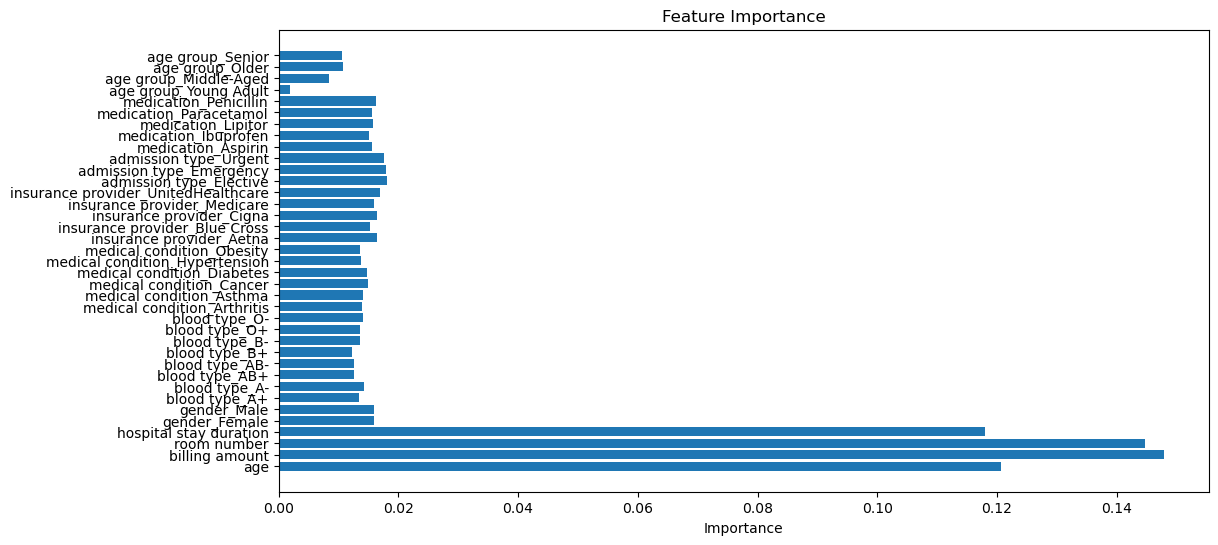

In [21]:
# Display feature importance
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=57)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=2, n_jobs=-1, verbose=2, random_state=57)

# Fit the randomized search
random_search.fit(X_train, y_train)

# Display the best parameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model with the best parameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 50 candidates, totalling 100 fits


/Users/halk/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
38 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/halk/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/halk/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/halk/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/Users/hal

Best hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 483}
Accuracy: 0.40855855855855855
              precision    recall  f1-score   support

    Abnormal       0.41      0.41      0.41      7501
Inconclusive       0.40      0.41      0.40      7302
      Normal       0.41      0.41      0.41      7397

    accuracy                           0.41     22200
   macro avg       0.41      0.41      0.41     22200
weighted avg       0.41      0.41      0.41     22200



In [24]:
# download cleaned dataset to csv for further analysis
df_encoded.to_csv('cleaned_dataset.csv', index=False)

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=170; total time=  12.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=277; total time=   9.3s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=358; total time=  22.9s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=201; total time=  13.5s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=407; total time=  46.2s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=408; total time=  19.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=361; total time=  25.8s
[CV] END bootstrap=False, max_depth=None, m